In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/tensorflow/python/f

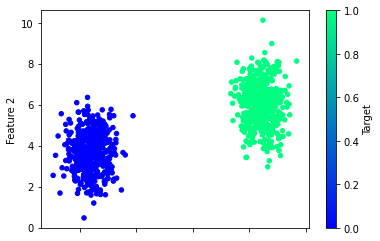

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()


In [ ]:
# Sequential model using Keras' Dense class! 
# the "input_dim" paramter indicates how many inputs will be in the model (in this case, two)

# the "units" parameter indicates how many neurons we want in the hidden layer (one in this case)

# the "activation" parameter indicates which activation functino to use.

In [6]:
# Add our first Dense Layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
#Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the Sequential model together and customize metrics 
nn_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [13]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
750/750 [==============================] - 0s 201us/sample - loss: 0.5942 - acc: 0.9773
Epoch 2/100
750/750 [==============================] - 0s 34us/sample - loss: 0.5820 - acc: 0.9987
Epoch 3/100
750/750 [==============================] - 0s 34us/sample - loss: 0.5695 - acc: 0.9987
Epoch 4/100
750/750 [==============================] - 0s 36us/sample - loss: 0.5566 - acc: 1.0000
Epoch 5/100
750/750 [==============================] - 0s 36us/sample - loss: 0.5434 - acc: 1.0000
Epoch 6/100
750/750 [==============================] - 0s 35us/sample - loss: 0.5299 - acc: 1.0000
Epoch 7/100
750/750 [==============================] - 0s 33us/sample - loss: 0.5162 - acc: 1.0000
Epoch 8/100
750/750 [==============================] - 0s 32us/sample - loss: 0.5023 - acc: 1.0000
Epoch 9/100
750/750 [==============================] - 0s 34us/sample - loss: 0.4885 - acc: 1.0000
Epoch 10/100
750/750 [==============================] - 0s 30us/sample - loss: 0.4746 - acc: 1.0000
Epoch 11

750/750 [==============================] - 0s 28us/sample - loss: 0.0884 - acc: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 27us/sample - loss: 0.0869 - acc: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 28us/sample - loss: 0.0855 - acc: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 29us/sample - loss: 0.0842 - acc: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 27us/sample - loss: 0.0829 - acc: 1.0000
Epoch 88/100
750/750 [==============================] - 0s 28us/sample - loss: 0.0816 - acc: 1.0000
Epoch 89/100
750/750 [==============================] - 0s 29us/sample - loss: 0.0803 - acc: 1.0000
Epoch 90/100
750/750 [==============================] - 0s 29us/sample - loss: 0.0790 - acc: 1.0000
Epoch 91/100
750/750 [==============================] - 0s 30us/sample - loss: 0.0778 - acc: 1.0000
Epoch 92/100
750/750 [==============================] - 0s 29us/sample - loss: 0.0766 - acc: 1.0000
Epoch 93/100


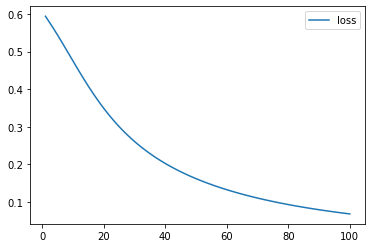

In [14]:
# Create a DataFrame containing training history 
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [16]:
# You can also plot the accuracy over time using the same DataFrame.

# plot the accuracy 

history_df.plot(y="accuracy")

KeyError: 'accuracy'

In [18]:
# Evaluate the model using the test data

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0698 - acc: 1.0000
Loss: 0.06981300202012063, Accuracy: 1.0


In [19]:
# Predict the classification of a new set of blob data

new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)

new_X_scaled = X_scaler.transform(new_X)

nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

In [20]:
# using Scikit-learn's MAKE_MOONS method 

from sklearn.datasets import make_moons

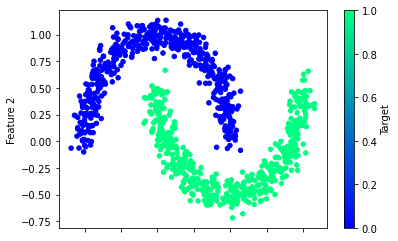

In [21]:
# Creating dummy nonlinear data

X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector 
y_moons = y_moons.reshape(-1,1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data

df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [22]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
X_moons, y_moons, random_state=78)


In [23]:
# Create the scaler instance 
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler 
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [24]:
# Training th model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 38us/sample - loss: 0.8920 - acc: 0.5613
Epoch 2/100
750/750 [==============================] - 0s 31us/sample - loss: 0.8070 - acc: 0.5800
Epoch 3/100
750/750 [==============================] - 0s 33us/sample - loss: 0.7470 - acc: 0.6013
Epoch 4/100
750/750 [==============================] - 0s 31us/sample - loss: 0.7041 - acc: 0.6187
Epoch 5/100
750/750 [==============================] - 0s 30us/sample - loss: 0.6714 - acc: 0.6293
Epoch 6/100
750/750 [==============================] - 0s 30us/sample - loss: 0.6443 - acc: 0.6427
Epoch 7/100
750/750 [==============================] - 0s 31us/sample - loss: 0.6209 - acc: 0.6533
Epoch 8/100
750/750 [==============================] - 0s 29us/sample - loss: 0.6000 - acc: 0.6653
Epoch 9/100
750/750 [==============================] - 0s 30us/sample - loss: 0.5810 - acc: 0.6680
Epoch 10/100
750/750 [==============================] - 0s 32us/sample - loss: 0.5631 - acc: 0.6800
Epoch 11/

750/750 [==============================] - 0s 29us/sample - loss: 0.2662 - acc: 0.8840
Epoch 84/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2657 - acc: 0.8853
Epoch 85/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2652 - acc: 0.8853
Epoch 86/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2648 - acc: 0.8867
Epoch 87/100
750/750 [==============================] - 0s 28us/sample - loss: 0.2643 - acc: 0.8867
Epoch 88/100
750/750 [==============================] - 0s 28us/sample - loss: 0.2639 - acc: 0.8880
Epoch 89/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2635 - acc: 0.8867
Epoch 90/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2631 - acc: 0.8880
Epoch 91/100
750/750 [==============================] - 0s 28us/sample - loss: 0.2628 - acc: 0.8867
Epoch 92/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2625 - acc: 0.8867
Epoch 93/100


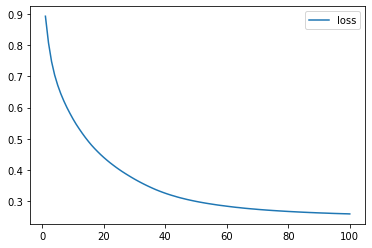

In [25]:
# Create a DataFrame containing training history 
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [27]:
# Plot the accuracy
# history_df.plot(y="accuracy")

In [ ]:
#### 19.2.5 #####

# Create the connective tissue, the multiple-neuron neural netowrk 


In [28]:
# Generate our new Sequential model

new_model = tf.keras.models.Sequential()



In [29]:
# Add the input and hidden layer

# remember neuron rule of thumb: 2-3x the number of variables (inputs) 
# for hidden layer neurons

number_inputs = 2
number_hidden_nodes=6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim= number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [30]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 155us/sample - loss: 0.5650 - acc: 0.7093
Epoch 2/100
750/750 [==============================] - 0s 38us/sample - loss: 0.5404 - acc: 0.7373
Epoch 3/100
750/750 [==============================] - 0s 37us/sample - loss: 0.5168 - acc: 0.7507
Epoch 4/100
750/750 [==============================] - 0s 37us/sample - loss: 0.4942 - acc: 0.7640
Epoch 5/100
750/750 [==============================] - 0s 35us/sample - loss: 0.4726 - acc: 0.7787
Epoch 6/100
750/750 [==============================] - 0s 34us/sample - loss: 0.4524 - acc: 0.7893
Epoch 7/100
750/750 [==============================] - 0s 30us/sample - loss: 0.4333 - acc: 0.8013
Epoch 8/100
750/750 [==============================] - 0s 34us/sample - loss: 0.4156 - acc: 0.8080
Epoch 9/100
750/750 [==============================] - 0s 31us/sample - loss: 0.3995 - acc: 0.8133
Epoch 10/100
750/750 [==============================] - 0s 33us/sample - loss: 0.3849 - acc: 0.8160
Epoch 11

750/750 [==============================] - 0s 31us/sample - loss: 0.1539 - acc: 0.9293
Epoch 84/100
750/750 [==============================] - 0s 31us/sample - loss: 0.1524 - acc: 0.9293
Epoch 85/100
750/750 [==============================] - 0s 30us/sample - loss: 0.1510 - acc: 0.9307
Epoch 86/100
750/750 [==============================] - 0s 28us/sample - loss: 0.1495 - acc: 0.9333
Epoch 87/100
750/750 [==============================] - 0s 32us/sample - loss: 0.1480 - acc: 0.9347
Epoch 88/100
750/750 [==============================] - 0s 29us/sample - loss: 0.1467 - acc: 0.9360
Epoch 89/100
750/750 [==============================] - 0s 31us/sample - loss: 0.1452 - acc: 0.9360
Epoch 90/100
750/750 [==============================] - 0s 29us/sample - loss: 0.1438 - acc: 0.9373
Epoch 91/100
750/750 [==============================] - 0s 30us/sample - loss: 0.1425 - acc: 0.9387
Epoch 92/100
750/750 [==============================] - 0s 31us/sample - loss: 0.1411 - acc: 0.9387
Epoch 93/100


In [31]:
# Ramen data time

# import dependencies 
import pandas as pd
import sklearn as skl

In [32]:
# read in our ramen data
ramen_df = pd.read_csv("ramen-ratings.csv")

# print out the country value counts
country_counts= ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Poland             4
Holland            4
Fiji               4
Sweden             3
Sarawak            3
Finland            3
Dubai              3
Estonia            2
Ghana              2
United States      1
Nigeria            1
Name: Country, dtype: int64

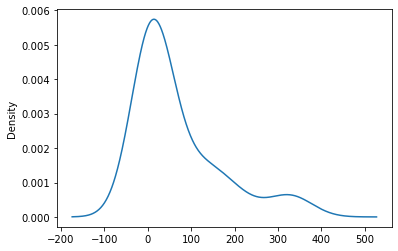

In [33]:
# Visualize the value counts -> density plot
country_counts.plot.density()

In [42]:
ramen_df.head()

Review #           Brand  \
0      2580       New Touch   
1      2579        Just Way   
2      2578          Nissin   
3      2577         Wei Lih   
4      2576  Ching's Secret   

                                             Variety Style Country Stars  \
0                          T's Restaurant Tantanmen    Cup   Japan  3.75   
1  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack  Taiwan     1   
2                      Cup Noodles Chicken Vegetable   Cup     USA  2.25   
3                      GGE Ramen Snack Tomato Flavor  Pack  Taiwan  2.75   
4                                    Singapore Curry  Pack   Other  3.75   

  Top Ten  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [35]:
# test numpy deal from class zoom

import numpy as np

# np.arange(10).reshape(10,1)
np.arange(10).reshape(5,2)

# as long as the reshape numbers multiply to equal the arange()
# value, it'll spit out an array with those dimensions.



array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [36]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in dataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country, "Other")


# Check to make sure binning was successful 
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [40]:
encode_df # w/o the enc.get_feature_names(['country'])

0    1    2    3    4    5    6    7    8    9   10   11
0     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
4     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
2575  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
2576  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
2577  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
2578  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
2579  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0

[2580 rows x 12 columns]

In [41]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns -> if you don't do this step, the column names
# a numeric range from 0-11...

encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

Country_China  Country_Hong Kong  Country_Indonesia  Country_Japan  \
0            0.0                0.0                0.0            1.0   
1            0.0                0.0                0.0            0.0   
2            0.0                0.0                0.0            0.0   
3            0.0                0.0                0.0            0.0   
4            0.0                0.0                0.0            0.0   

   Country_Malaysia  Country_Other  Country_Singapore  Country_South Korea  \
0               0.0            0.0                0.0                  0.0   
1               0.0            0.0                0.0                  0.0   
2               0.0            0.0                0.0                  0.0   
3               0.0            0.0                0.0                  0.0   
4               0.0            1.0                0.0                  0.0   

   Country_Taiwan  Country_Thailand  Country_USA  Country_Vietnam  
0             0.0               0.0          0.0              0.0  
1             1.0               0.0          0.0              0.0  
2             0.0               0.0          1.0              0.0  
3             1.0               0.0          0.0              0.0  
4             0.0               0.0          0.0              0.0

In [43]:
# Merge the two DataFrames together and drop the country column

ramen_df.merge(encode_df, left_index=True, right_index=True).drop("Country", 1)

Review #           Brand  \
0         2580       New Touch   
1         2579        Just Way   
2         2578          Nissin   
3         2577         Wei Lih   
4         2576  Ching's Secret   
...        ...             ...   
2575         5           Vifon   
2576         4         Wai Wai   
2577         3         Wai Wai   
2578         2         Wai Wai   
2579         1        Westbrae   

                                                Variety Style Stars Top Ten  \
0                             T's Restaurant Tantanmen    Cup  3.75     NaN   
1     Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack     1     NaN   
2                         Cup Noodles Chicken Vegetable   Cup  2.25     NaN   
3                         GGE Ramen Snack Tomato Flavor  Pack  2.75     NaN   
4                                       Singapore Curry  Pack  3.75     NaN   
...                                                 ...   ...   ...     ...   
2575  Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...  Bowl   3.5     NaN   
2576                     Oriental Style Instant Noodles  Pack     1     NaN   
2577                                     Tom Yum Shrimp  Pack     2     NaN   
2578                               Tom Yum Chili Flavor  Pack     2     NaN   
2579                                         Miso Ramen  Pack   0.5     NaN   

      Country_China  Country_Hong Kong  Country_Indonesia  Country_Japan  \
0               0.0                0.0                0.0            1.0   
1               0.0                0.0                0.0            0.0   
2               0.0                0.0                0.0            0.0   
3               0.0                0.0                0.0            0.0   
4               0.0                0.0                0.0            0.0   
...             ...                ...                ...            ...   
2575            0.0                0.0                0.0            0.0   
2576            0.0                0.0                0.0            0.0   
2577            0.0                0.0                0.0            0.0   
2578            0.0                0.0                0.0            0.0   
2579            0.0                0.0                0.0            0.0   

      Country_Malaysia  Country_Other  Country_Singapore  Country_South Korea  \
0                  0.0            0.0                0.0                  0.0   
1                  0.0            0.0                0.0                  0.0   
2                  0.0            0.0                0.0                  0.0   
3                  0.0            0.0                0.0                  0.0   
4                  0.0            1.0                0.0                  0.0   
...                ...            ...                ...                  ...   
2575               0.0            0.0                0.0                  0.0   
2576               0.0            0.0                0.0                  0.0   
2577               0.0            0.0                0.0                  0.0   
2578               0.0            0.0                0.0                  0.0   
2579               0.0            0.0                0.0                  0.0   

      Country_Taiwan  Country_Thailand  Country_USA  Country_Vietnam  
0                0.0               0.0          0.0              0.0  
1                1.0               0.0          0.0              0.0  
2                0.0               0.0          1.0              0.0  
3                1.0               0.0          0.0              0.0  
4                0.0               0.0          0.0              0.0  
...              ...               ...          ...              ...  
2575             0.0               0.0          0.0              1.0  
2576             0.0               1.0          0.0              0.0  
2577             0.0               1.0          0.0              0.0  
2578             0.0               1.0          0.0 

In [ ]:
# Generate our categorical variable list

attrition_cat = a